# sample puzzles 2 label

In [77]:
import numpy as np
import json
import matplotlib.pyplot as plt
path = "/media/data/flowers/OpenELM/src/openelm/utils/preprocess_p3_emb.json"
with open(path, 'r') as f:
    data = json.load(f)
list_prg=[puz["program_str"] for puz in data]
for puzz in data:
    
    emb=np.array(puzz["emb"],dtype=int).tolist()
    puzz["emb"]=emb

In [78]:
(all_emb.sum(axis=1)==0).sum()

86

Text(0.5, 1.0, 'number of puzzle per skill (trainset)')

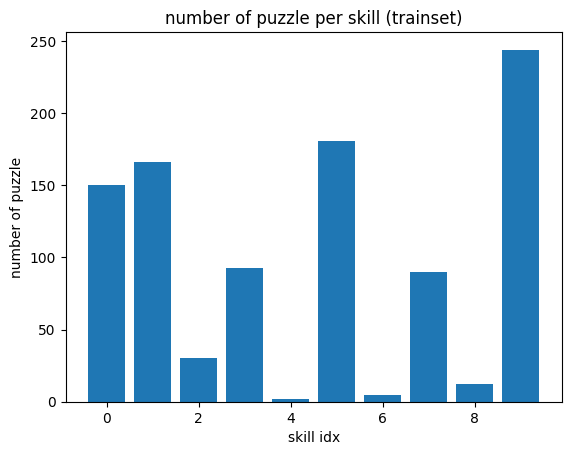

In [81]:
all_emb= [puzz["emb"] for puzz in data]
all_emb=np.array(all_emb,dtype=int)
sum_emb=np.sum(all_emb,axis=0)
plt.bar(np.arange(10),sum_emb)
plt.xlabel("skill idx")
plt.ylabel("number of puzzle")
plt.title("number of puzzle per skill (trainset)")

In [76]:
import numpy as np
import json
import copy
import matplotlib.pyplot as plt
rng = np.random.default_rng(seed=1)
list_puzzle_2_label=[]
list_label=np.array([0. for _ in range((10))])

path = "/media/data/flowers/OpenELM/src/openelm/utils/preprocess_p3_emb.json"
with open(path, 'r') as f:
    data = json.load(f)
list_prg=[puz["program_str"] for puz in data]
list_emb=[puz["emb"] for puz in data]
idx_uniform=rng.choice(len(data), 30, replace=False)
idx_uniform = np.sort(idx_uniform)[::-1]
print(len(data))
for idx_unif in idx_uniform:
    list_puzzle_2_label.append(copy.deepcopy(data[idx_unif]))
    list_label-=np.array(data[idx_unif]["emb"])
    del data[idx_unif]
print(len(data))

for idx_del,puzz in enumerate(data):
    
    emb=np.array(puzz["emb"],dtype=int).tolist()
    puzz["emb"]=emb
    if np.sum(emb)==10:# 10 skills is often a bug
        del data[idx_del]
print(len(data))


while len(list_puzzle_2_label)<60:
    idx_shuffle=np.array([i for i in range(len(data))])
    rng.shuffle(idx_shuffle)
    for choosen_idx in idx_shuffle:
        if len(list_puzzle_2_label)>=60:
            break
        #choose idx2aim (lowest skills sampled)
        all_emb= [puzz["emb"] for puzz in data]
        all_emb=np.array(all_emb,dtype=int)
        sum_emb=np.sum(all_emb,axis=0)
        sort_idx=list(np.argsort(list_label)[::-1])
        for idx2sample in sort_idx:
            if sum_emb[idx2sample]>0:
                break
        puzzle=data[choosen_idx]
        emb=puzzle["emb"]
        if emb[idx2sample]==1:
            list_puzzle_2_label.append(puzzle)
            list_label-=np.array(emb)
            del data[choosen_idx]
            break
        
all_emb= [puzz["emb"] for puzz in data]
all_emb=np.array(all_emb,dtype=int)
sum_emb=np.sum(all_emb,axis=0)

list_label,sum_emb


536
506
506


(array([-13., -14., -14., -14.,  -2., -18.,  -5., -16., -12., -28.]),
 array([137, 152,  16,  79,   0, 163,   0,  74,   0, 216]))

In [ ]:
(subset2label)

Text(0.5, 1.0, 'number of puzzle per skill (subset2label)')

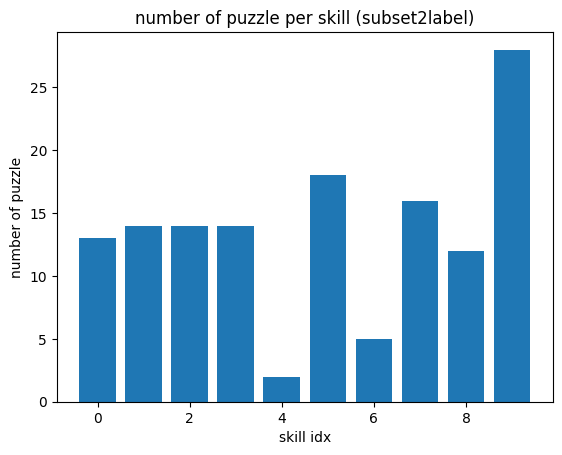

In [82]:
plt.bar([i for i in range(10)],-list_label)
plt.xlabel("skill idx")
plt.ylabel("number of puzzle")
plt.title("number of puzzle per skill (subset2label)" )

In [ ]:
# save
list_puzzle_2_label
path = "/media/data/flowers/OpenELM/tests/subset2label.json"
with open(path, 'w') as f:
    json.dump(list_puzzle_2_label,f,indent=4)



In [89]:
#split in two
data2label_jul = data2label[:30]
data2label_lae = data2label[30:]
# save

path = "/media/data/flowers/OpenELM/tests/subset2label_jul.json"
with open(path, 'w') as f:
    json.dump(data2label_jul,f,indent=4)
path = "/media/data/flowers/OpenELM/tests/subset2label_lae.json"
with open(path, 'w') as f:
    json.dump(data2label_lae,f,indent=4)

# load

In [ ]:
#load
list_puzzle_2_label
path = "/media/data/flowers/OpenELM/tests/subset2label.json"
with open(path, 'r') as f:
    data2label = json.load(f)

In [14]:
import json
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix
from openelm.environments.p3 import skill_list

puzz_1="/media/data/flowers/OpenELM/tests/subset2label_jul.json"
puzz_2="/media/data/flowers/OpenELM/tests/subset2label_lae.json"
puzz_save="/media/data/flowers/OpenELM/tests/subset2label_jul-lae.json"
with open(puzz_1, 'r') as f:
    puzz_1 = json.load(f)
with open(puzz_2, 'r') as f:    
    puzz_2 = json.load(f)

all_puzz=puzz_1+puzz_2
with open(puzz_save, 'w') as f:    
    json.dump(all_puzz,f,indent=4)


# plot

In [9]:
# # compare chat gpt against human label
# import json
# import matplotlib.pyplot as plt
# from sklearn.metrics import multilabel_confusion_matrix
# # from openelm.environments.p3 import skill_list

# puzz_1="/media/data/flowers/OpenELM/tests/subset2label_jul.json"
# puzz_2="/media/data/flowers/OpenELM/tests/subset2label_lae.json"
# with open(puzz_1, 'r') as f:
#     puzz_1 = json.load(f)
# with open(puzz_2, 'r') as f:    
#     puzz_2 = json.load(f)

# puzz_1=puzz_1+puzz_2
# # check if "GT_emb" is in the first or second dict and add the misssing key
# for i in range(len(puzz_1)):
#     if "GT_emb" in puzz_1[i]:
#         pass
#     else : 
#         del puzz_1[i]
#         print("error",i)
#     # elif "GT_emb" in puzz_2[i]:
#     #     puzz_1[i]["GT_emb"]=puzz_2[i]["GT_emb"]
#     # else: 
#     #     print("error",i)
# GT_target=[puzz["GT_emb"] for puzz in puzz_1]
# predic_emb=[puzz["emb"] for puzz in puzz_1]
# GT_target[:4],predic_emb[:4]

## human vs h

In [43]:
# compare chat human against human label
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix

# puzz_1="/media/data/flowers/OpenELM/tests/subset2label_jul.json"
# puzz_2="/media/data/flowers/OpenELM/tests/subset2label_lae.json"
# with open(puzz_1, 'r') as f:
#     puzz_1 = json.load(f)
# with open(puzz_2, 'r') as f:    
#     puzz_2 = json.load(f)
# for i in range(len(puzz_1)):
#     puzz_1[i]["GT_emb_jul"]=puzz_1[i]["GT_emb"]
# for i in range(len(puzz_2)):
#     puzz_2[i]["GT_emb_lae"]=puzz_2[i]["GT_emb"]


# puzz_1=puzz_1+puzz_2
# path_save= "/media/data/flowers/OpenELM/tests/subset2label_jul+lae.json"
# with open(path_save, 'w') as f:    
#     json.dump(puzz_1,f,indent=4)



## gpt4

In [15]:
#gpt4 label
path="/media/data/flowers/OpenELM/tests/subset2label_jul-lae_gpt4.json"
with open(path, 'r') as f:
    puzz_1 = json.load(f)
GT_target=[puzz["GT_emb"] for puzz in puzz_1]
predic_emb=[puzz["gpt4_label"] for puzz in puzz_1]
# predic_emb=[puzz["emb"] for puzz in puzz_1]
# GT_target[:4],predic_emb[:4]

([[0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
  [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]],
 [[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  [0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]])

## plot

In [47]:
not(True)

False

/tmp/ipykernel_37276/4206906429.py:49: RuntimeWarning: invalid value encountered in divide
  matrix = confusion_matrix[i] / confusion_matrix[i].sum(axis=1, keepdims=True)


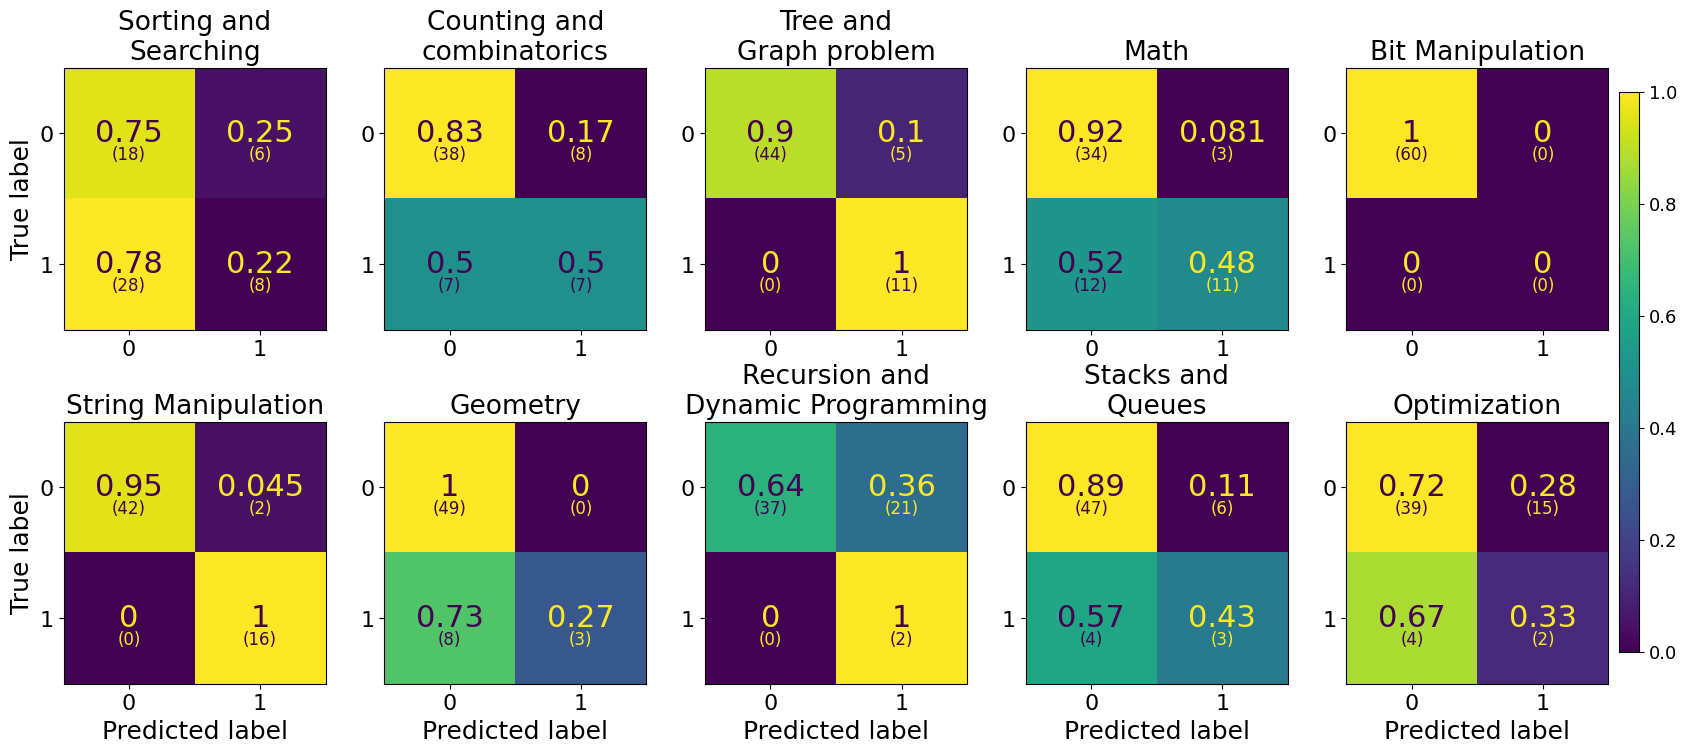

In [3]:
from sklearn.metrics import multilabel_confusion_matrix
from openelm.environments.p3 import skill_list
import matplotlib.pyplot as plt
import sklearn.metrics as skmetr
import numpy as np
import json

path_save= "/media/data/flowers/OpenELM/tests/subset2label_jul+lae_cot.json"
with open(path_save, 'r') as f:    
    puzz_1 = json.load(f)
    
GT_target_lae=[puzz["GT_emb_lae"] for puzz in puzz_1]
GT_target_jul=[puzz["GT_emb_jul"] for puzz in puzz_1]
predic_emb=[puzz["emb"] for puzz in puzz_1]

def print_confus(y_true=GT_target_lae, y_pred=predic_emb):
    skill_list=['Sorting and\nSearching',
    'Counting and\ncombinatorics',
    'Tree and\nGraph problem',
    'Math',
    'Bit Manipulation',
    'String Manipulation',
    'Geometry',
    'Recursion and\nDynamic Programming',
    'Stacks and\nQueues',
    'Optimization']
    # skill_list[7] = 'Recursion and \nDynamic Programming'
    normalize = "true"

    f, axes = plt.subplots(2, 5, figsize=(20, 8))
    axes = axes.ravel()
    f.subplots_adjust(hspace=0.35)

    # Add a single colorbar to the figure
    cbar_ax = f.add_axes([0.904, 0.15, 0.01, 0.7])  # [left, bottom, width, height]
    vmin = 0
    vmax = 1 if normalize in ["true", "all"] else confusion_matrix.max()

    cbar = plt.colorbar(plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=vmin, vmax=vmax)), cax=cbar_ax)
    cbar.ax.tick_params(labelsize=13)  # Increase font size for colorbar tick labels


    confusion_matrix = multilabel_confusion_matrix(y_true=y_true, y_pred=y_pred)

    # Get the min and max values for the colorbar

    for i, ax in enumerate(axes):
        if normalize == "true":
            matrix = confusion_matrix[i] / confusion_matrix[i].sum(axis=1, keepdims=True)
        elif normalize == "all":
            matrix = confusion_matrix[i] / confusion_matrix[i].sum()
        else:
            matrix = confusion_matrix[i]
        # print("i  :"+skill_list[i])
        matrix= np.nan_to_num(matrix)
        # print(matrix)
        disp = skmetr.ConfusionMatrixDisplay(matrix, display_labels=[0, 1])
        disp.plot(ax=ax, values_format='.2g', cmap='viridis', colorbar=False)

        # Increase font size for the normalized values and annotate with raw values
        for j in range(2):
            for k in range(2):
                # Get the current text value (normalized value)
                current_text = disp.text_[j, k].get_text()
                
                # Get the color of the normalized value
                current_color = disp.text_[j, k].get_color()
                
                # Set the font size for the normalized value
                disp.text_[j, k].set_fontsize(22)
                
                # Annotate with the raw value from the confusion matrix in parentheses
                ax.annotate("({})".format(confusion_matrix[i][j, k]),
                            xy=disp.text_[j, k].get_position(),
                            ha='center',
                            va='center_baseline',
                            fontsize=12,  # Smaller font size for the raw value
                            xytext=(0, -14),  # Adjust this offset as needed
                            textcoords='offset points',
                            color=current_color)  # Set the color to match the normalized value


                
        # Increase font size for titles
        disp.ax_.set_title(skill_list[i], fontsize=19)
        
        # Hide x and y labels for all subplots
        ax.set_xlabel('')
        ax.set_ylabel('')
        
        # Increase font size for tick labels
        ax.tick_params(axis='both', which='major', labelsize=16)

    # Set x and y labels for the desired subplot with increased font size
    for i in range(5,10):
        axes[i].set_xlabel('Predicted label', fontsize=18)  # Bottom left subplot for xlabel
    axes[5].set_ylabel('True label', fontsize=18)        # Top left subplot for ylabel
    axes[0].set_ylabel('True label', fontsize=18)        # Top left subplot for ylabel


    # plt.tight_layout(pad=0.8)
    # plt.savefig("/media/data/flowers/OpenELM/last_fig/confusion_matrix.pdf")
    plt.show()
print_confus(y_true=GT_target_lae, y_pred=predic_emb)

/tmp/ipykernel_37276/4206906429.py:49: RuntimeWarning: invalid value encountered in divide
  matrix = confusion_matrix[i] / confusion_matrix[i].sum(axis=1, keepdims=True)


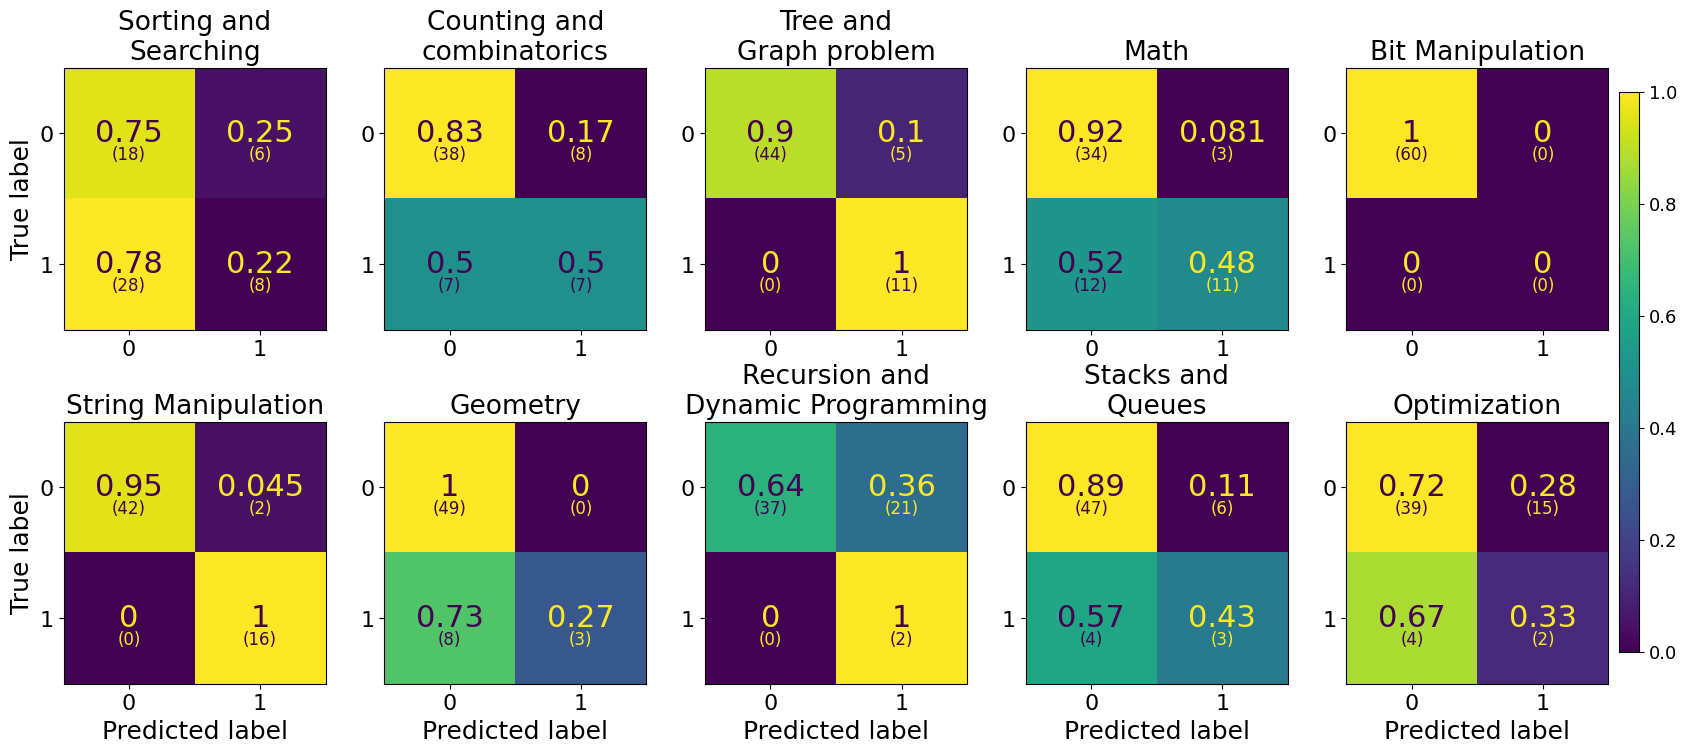

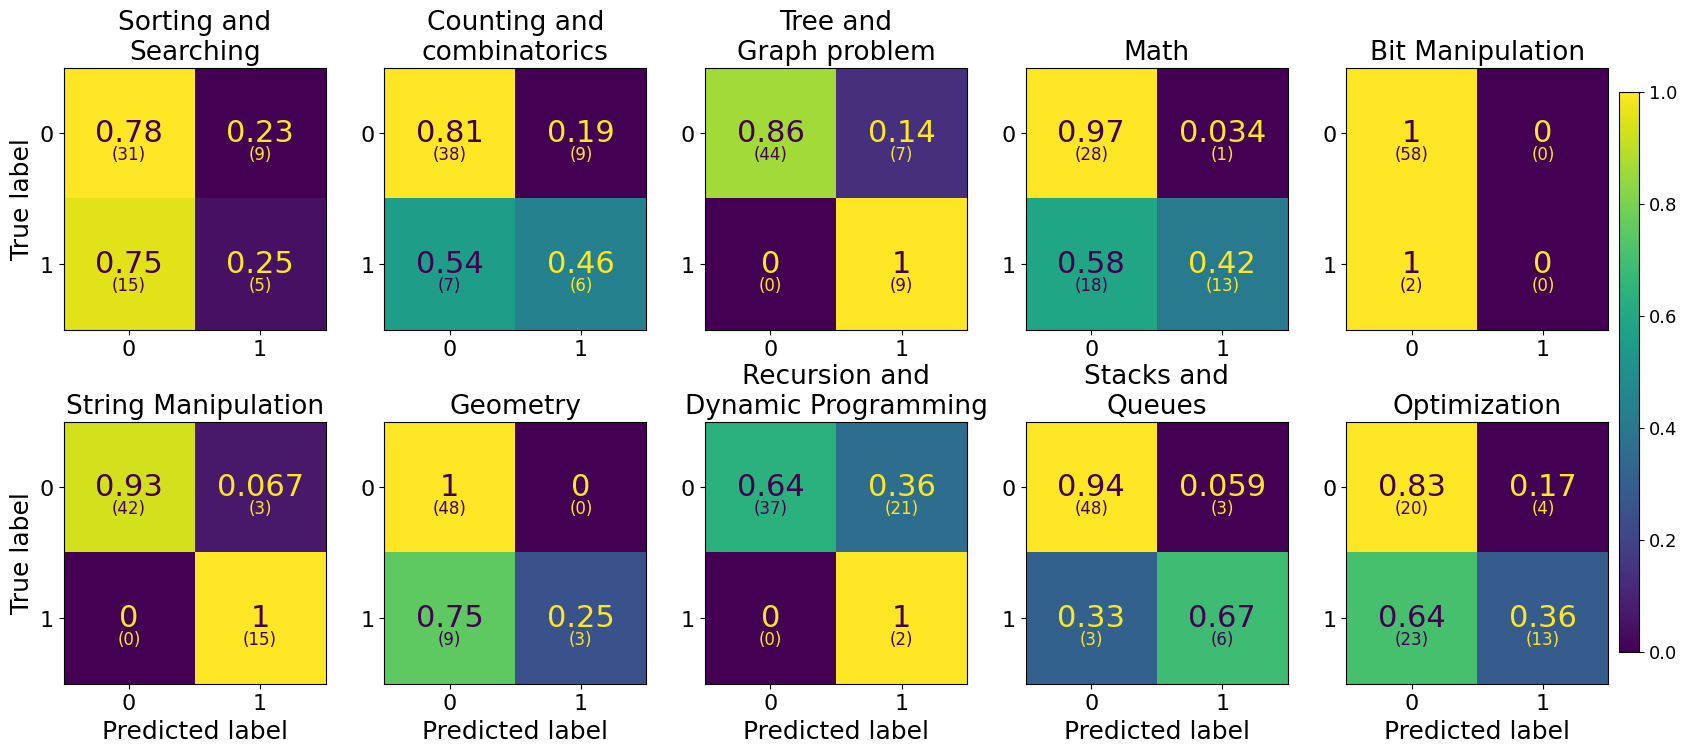

In [4]:
print_confus(y_true=GT_target_lae, y_pred=predic_emb)
print_confus(y_true=GT_target_jul, y_pred=predic_emb)

In [5]:
from sklearn.metrics import classification_report

out=classification_report(GT_target_jul,predic_emb,output_dict=False)
print(out)#y_true, y_pred, target_names=target_names
# score_jul=classification_report(GT_target_jul,predic_emb,output_dict=True)
out=classification_report(GT_target_lae,predic_emb,output_dict=False)
print(out)#y_true, y_pred, target_names=target_names
score_lae=classification_report(GT_target_jul,predic_emb,output_dict=True)
score_lae["weighted avg"]["f1-score"]

              precision    recall  f1-score   support

           0       0.36      0.25      0.29        20
           1       0.40      0.46      0.43        13
           2       0.56      1.00      0.72         9
           3       0.93      0.42      0.58        31
           4       0.00      0.00      0.00         2
           5       0.83      1.00      0.91        15
           6       1.00      0.25      0.40        12
           7       0.09      1.00      0.16         2
           8       0.67      0.67      0.67         9
           9       0.76      0.36      0.49        36

   micro avg       0.56      0.48      0.52       149
   macro avg       0.56      0.54      0.46       149
weighted avg       0.70      0.48      0.53       149
 samples avg       0.59      0.56      0.53       149

              precision    recall  f1-score   support

           0       0.57      0.22      0.32        36
           1       0.47      0.50      0.48        14
           2       0.69 

/media/data/flowers/conda/envs/codegpt/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/data/flowers/conda/envs/codegpt/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/media/data/flowers/conda/envs/codegpt/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, l

0.5252458632118816

In [ ]:
           0       0.60      0.15      0.24        20
           1       0.41      0.54      0.47        13
           2       0.47      1.00      0.64         9
           3       0.91      0.32      0.48        31
           4       1.00      0.50      0.67         2
           5       0.83      1.00      0.91        15
           6       1.00      0.25      0.40        12
           7       0.07      1.00      0.13         2
           8       0.73      0.89      0.80         9
           9       0.78      0.39      0.52        36

   micro avg       0.55      0.48      0.51       149
   macro avg       0.68      0.60      0.52       149
weighted avg       0.74      0.48      0.52       149
 samples avg       0.56      0.52      0.51       149

              precision    recall  f1-score   support

           0       0.80      0.11      0.20        36
           1       0.47      0.57      0.52        14
           2       0.58      1.00      0.73        11
           3       0.91      0.43      0.59        23
           4       0.00      0.00      0.00         0
           5       0.89      1.00      0.94        16
           6       1.00      0.27      0.43        11
           7       0.07      1.00      0.13         2
           8       0.45      0.71      0.56         7
           9       0.06      0.17      0.08         6

   micro avg       0.45      0.48      0.47       126
   macro avg       0.52      0.53      0.42       126
weighted avg       0.73      0.48      0.48       126
 samples avg       0.52      0.52      0.49       126

## Completion analysis

In [98]:
list_com[idx][1]

{'0': ['The problem is to find a sequence of moves to reach a given goal state from an initial state of water quantities in jugs, where pouring one jug into another is allowed until it is full or the first jug is empty. The solution uses a breadth-first search algorithm to explore all possible states and find the shortest path to the goal state.\n\nRequired skills:\n0 - Sorting and Searching: Not required\n1 - Counting and combinatorics: Not required\n2 - Tree and Graph problem: Required\n3 - Math: Not required\n4 - Bit Manipulation: Not required\n5 - String Manipulation: Not required\n6 - Geometry: Not required\n7 - Recursion and Dynamic Programming: Not required\n8 - Stacks and Queues: Required\n9 - Optimization: Not required\n\nTherefore, the list of skills for the puzzle is: [2, 8]',
  [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]],
 '1': 'The problem is to find a list with a certain number of duplicate items. The solution is to create a list of length dups + 1, where each ele

In [99]:
eval("[]")

[]

In [102]:
idx=30
list_k=list_com[idx][1].keys()
for k in list_k:
    print(list_com[idx][1][k])

['The problem is to find a sequence of moves to reach a given goal state from an initial state of water quantities in jugs, where pouring one jug into another is allowed until it is full or the first jug is empty. The solution uses a breadth-first search algorithm to explore all possible states and find the shortest path to the goal state.\n\nRequired skills:\n0 - Sorting and Searching: Not required\n1 - Counting and combinatorics: Not required\n2 - Tree and Graph problem: Required\n3 - Math: Not required\n4 - Bit Manipulation: Not required\n5 - String Manipulation: Not required\n6 - Geometry: Not required\n7 - Recursion and Dynamic Programming: Not required\n8 - Stacks and Queues: Required\n9 - Optimization: Not required\n\nTherefore, the list of skills for the puzzle is: [2, 8]', [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]]
The problem is to find a list with a certain number of duplicate items. The solution is to create a list of length dups + 1, where each element is 1. The f

In [5]:
path_ex="/media/data/flowers/OpenELM/tests/subset2label_jul+lae_cot.json"
with open(path_ex, 'r') as f:    
    puzz_1 = json.load(f)
    
list_com=[[puzz["program_str"],puzz["completion"]] for puzz in puzz_1]

(array([ 3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 12.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 19.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 22.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  4.]),
 array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
        0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
        0.88, 0.92, 0.96, 1.  , 1.04, 1.08, 1.12, 1.16, 1.2 , 1.24, 1.28,
        1.32, 1.36, 1.4 , 1.44, 1.48, 1.52, 1.56, 1.6 , 1.64, 1.68, 1.72,
        1.76, 1.8 , 1.84, 1.88, 1.92, 1.96, 2.  , 2.04, 2.08, 2.12, 2.16,
        2.2 , 2.24, 2.28, 2.32, 2.36, 2.4 , 2.44, 2.48, 2.52, 2.

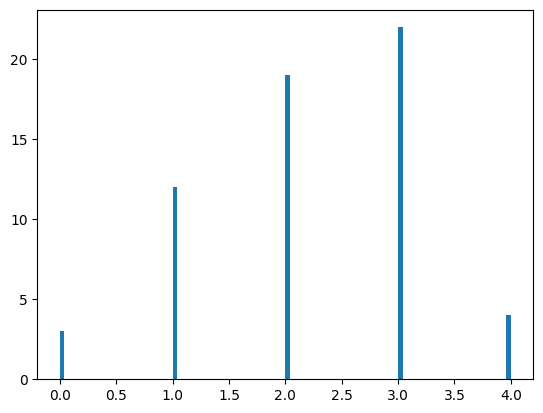

In [6]:
list=[]
for i in puzz_1:
    list.append(np.sum(i["emb"]))
plt.hist(list,bins=100)

In [70]:
response="Therefore, the list of skills for the puzzle is: [ ]"
split_completion=response.split("he list of skills for the puzzle is:")
split_completion=split_completion[1].split("]")[0]+"]"
category_idx_predicted = eval(split_completion) 
n_skills=10
# cond1=not(len(category_idx_predicted) > n_skills or max(category_idx_predicted) > n_skills)
len(category_idx_predicted)

0

In [76]:
for i in range(len(list_com)):
        list_k=list_com[i][1].keys()

        print((list_com[i][1]))

{'0': ['The problem in this puzzle is to determine whether the sum of a given number x and a constant value a is equal to another constant value b. The solution to this problem is to subtract the constant value a from the constant value b and check if the result is equal to x.\n\nSkills required:\n0 - Sorting or Searching: Not required.\n1 - Counting or combinatorics: Not required.\n2 - Tree and Graph problem: Not required.\n3 - Math: Not required.\n4 - Bit Manipulation: Not required.\n5 - String Manipulation: Not required.\n6 - Geometry: Not required.\n7 - Recursion or Dynamic Programming: Not required.\n8 - Stacks or Queues: Not required.\n9 - Optimization: Not required.\n\nTherefore, the list of skills for the puzzle is: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]', [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]]}
{'0': ['The problem in this puzzle is to determine whether the unary negation of a given number is equal to a specific value. The function f takes an integer x as input and checks 

In [71]:
for i in range(len(list_com)):
        list_k=list_com[i][1].keys()

        if len(list_k)!=1:
            print("============")
            print('puzzle idx:',i)
            print(list_com[i][0])
            for k in list_k:
                print("\n---\n")
                print(f"completion : {int(k)+1}/{len(list_k)} ")
                if len(list_com[i][1][k])==2:
                    print(i)
                    print(list_com[i][1][k][0])
                else:
                    print(list_com[i][1][k])
            

In [79]:
a="""6 - Geometry: Not required.
7 - Recursion or Dynamic Programming: Not required.
8 - Stacks or Queues: Not required."""
a.count("Not required")

3

In [29]:
skill_i=0
for i in range(len(list_com)):
    if puzz_1[i]["GT_emb_lae"][skill_i] == 1 and puzz_1[i]["emb"][skill_i]==0:
        list_k=list_com[i][1].keys()
        print("============")
        print('puzzle idx:',i)
        print(list_com[i][0])
        for k in list_k:
            print("\n---\n")
            print(f"completion : {int(k)+1}/{len(list_k)} ")
            if len(list_com[i][1][k])==2:
                print(list_com[i][1][k][0])
                print(list_com[i][1][k][1])
            else:
                print(list_com[i][1][k])
            

puzzle idx: 5
def f(s: str, a='bafywihequyjicivicharyquynikixuhinyqu', b='syrapetagecvicharyquynirorazecheth', length=12) -> bool:
    """Find a string of length length that is in both strings a and b"""
    return len(s) == length and s in a and (s in b)
def g(a = 'bafywihequyjicivicharyquynikixuhinyqu', b = 'syrapetagecvicharyquynirorazecheth', length = 12):
    for i in range(len(a) - length + 1):
        if a[i:i + length] in b:
            return a[i:i + length]
assert f(g())

---

completion : 1/1 
The problem is to find a string of length `length` that is present in both strings `a` and `b`. The solution `f` checks if the length of the input string `s` is equal to `length` and if `s` is present in both `a` and `b`.

Required skills:
0 - Sorting or Searching: Not required.
1 - Counting or combinatorics: Not required.
2 - Tree and Graph problem: Not required.
3 - Math: Not required.
4 - Bit Manipulation: Not required.
5 - String Manipulation: Required for understanding and solving

In [24]:
for i in range(len(list_com)):
    list_k=list_com[i][1].keys()
    print("============")
    print('puzzle idx:',i)
    print(list_com[i][0])
    for k in list_k:
        print("\n---\n")
        print(f"completion : {int(k)+1}/{len(k)} ")
        if len(list_com[i][1][k])==2:
            print(list_com[i][1][k][0])
        else:
            print(list_com[i][1][k])
        

puzzle idx: 0
def f(x: int, a=7176599374880969, b=1013347182263591) -> bool:
    """Solve a sum problem"""
    return a + x == b
def g(a = 7176599374880969, b = 1013347182263591):
    return b - a
assert f(g())

---

completion : 1/1 
The problem is to determine whether the sum of a given number x and a constant value a is equal to another constant value b. The solution is to subtract the constant value a from the constant value b and return the result. 

Therefore, the list of indices for the problem is: [3, 9]
puzzle idx: 1
def f(x: int, a=-6405550227918699) -> bool:
    """Solve a unary negation problem"""
    return -x == a
def g(a = -6405550227918699):
    return - a
assert f(g())

---

completion : 1/1 
The problem is to determine if the unary negation of a given number is equal to a specific value. The solution checks if the unary negation of the number returned by function g is equal to the predefined value.

Therefore, the list of indices for the problem is: [0]
puzzle idx: 2


In [78]:
key_word= "check"
for i in range(len(list_com)):
    if key_word in list_com[i][0]:
        list_k=list_com[i][1].keys()
        print("============")
        print('puzzle idx:',i)
        print(list_com[i][0])
        for k in list_k:
            print("\n---\n")
            print(f"completion : {int(k)+1}/{len(k)} ")
            if len(list_com[i][1][k])==2:
                print(list_com[i][1][k][0])
            else:
                print(list_com[i][1][k])

puzzle idx: 25
def f(squares: List[List[int]], m=41, n=12, target=492) -> bool:
    """Tile an m x n checkerboard with 2 x 1 tiles. The solution is a list of fourtuples [i1, j1, i2, j2] with
    i2 == i1 and j2 == j1 + 1 or i2 == i1 + 1 and j2 == j1 with no overlap."""
    covered = []
    for (i1, j1, i2, j2) in squares:
        assert 0 <= i1 <= i2 < m and 0 <= j1 <= j2 < n and (j2 - j1 + i2 - i1 == 1)
        covered += [(i1, j1), (i2, j2)]
    return len(set(covered)) == len(covered) == target
def g(m = 41, n = 12, target = 492):
    if m % 2 == 0:
        ans = [[i, j, i + 1, j] for i in range(0, m, 2) for j in range(n)]
    elif n % 2 == 0:
        ans = [[i, j, i, j + 1] for i in range(m) for j in range(0, n, 2)]
    else:
        ans = [[i, j, i + 1, j] for i in range(1, m, 2) for j in range(n)]
        ans += [[0, j, 0, j + 1] for j in range(0, n - 1, 2)]
    return ans
assert f(g())

---

completion : 1/1 
The problem is to tile an m x n checkerboard with 2 x 1 tiles, where t

In [ ]:
# compare chat human against human label
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix

# puzz_1="/media/data/flowers/OpenELM/tests/subset2label_jul.json"
# puzz_2="/media/data/flowers/OpenELM/tests/subset2label_lae.json"
# with open(puzz_1, 'r') as f:
#     puzz_1 = json.load(f)
# with open(puzz_2, 'r') as f:    
#     puzz_2 = json.load(f)
# for i in range(len(puzz_1)):
#     puzz_1[i]["GT_emb_jul"]=puzz_1[i]["GT_emb"]
# for i in range(len(puzz_2)):
#     puzz_2[i]["GT_emb_lae"]=puzz_2[i]["GT_emb"]


# puzz_1=puzz_1+puzz_2
# path_save= "/media/data/flowers/OpenELM/tests/subset2label_jul+lae.json"
# with open(path_save, 'w') as f:    
#     json.dump(puzz_1,f,indent=4)



In [11]:
path_puzzles="/media/data/flowers/OpenELM/src/openelm/utils/preprocess_p3_emb.json"
path_puz="/media/data/flowers/OpenELM/src/openelm/utils/preprocess_p3_emb_3_puzzles.json"
with open(path_puzzles) as f:
    archive=json.load(f)
with open(path_puz) as f:
    a=json.load(f)
list_a=[puz["program_str"] for puz in a]
list_archive=[puz["program_str"] for puz in archive]

In [22]:
for i in list_a:
        print(i)

def f(n: int, s='RObAQuYK', t='robaQUYKkuLY') -> bool:
    """Ignoring case, compare s, t lexicographically. Output 0 if they are =, -1 if s < t, 1 if s > t."""
    if n == 0:
        return s.lower() == t.lower()
    if n == 1:
        return s.lower() > t.lower()
    if n == -1:
        return s.lower() < t.lower()
    return False
def g(s = 'RObAQuYK', t = 'robaQUYKkuLY'):
    if s.lower() == t.lower():
        return 0
    if s.lower() > t.lower():
        return 1
    return -1
assert f(g())
def f(s: str, a=2996, d=6808) -> bool:
    """Find a string with a given number of a's and d's"""
    return s.count('a') == a and s.count('d') == d and (len(s) == a + d)
def g(a = 2996, d = 6808):
    return "a" * a + "d" * d
assert f(g())
def f(start: int, k=9, lower=-183, seq=[44, -94, 25, -63, -39, -71, -34, 84, -35]) -> bool:
    """Find a sequence of k consecutive indices whose sum is maximal"""
    return 0 <= start <= len(seq) - k and sum(seq[start:start + k]) >= lower
def g(k = 9, low

In [15]:
def f(s: str, a=2996, d=6808) -> bool:
    """Find a string with a given number of a's and d's"""
    return s.count('a') == a and s.count('d') == d and (len(s) == a + d)
def g(a = 2996, d = 6808):
    return "a" * a + "d" * d
assert f(g())

In [10]:
def f(s: str, chars=['[', '/', 'g']) -> bool:
    """Find a string with certain characters"""
    for c in chars:
        if c not in s:
            return False
    return True
def g():
    pass
assert f(g())

TypeError: argument of type 'NoneType' is not iterable

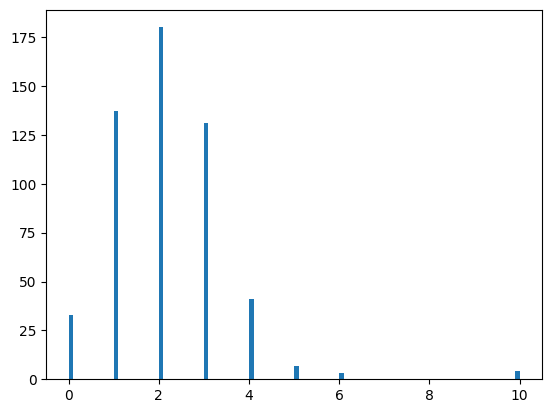

In [6]:
path_puzzles="/media/data/flowers/OpenELM/src/openelm/utils/preprocess_p3_emb.json"
with open(path_puzzles) as f:
    archive=json.load(f)
list_emb =[item["emb"] for item in archive]
count=0
plt.hist((np.sum(list_emb,axis=1)),bins=100)
plt.show()

# other stuff

In [ ]:
import numpy as np

truth_labels = [
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 1]
]

detected_labels = [
 [0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 1, 1, 0],
 [0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 1, 0, 0, 1, 0]
]



# number of labels
n_labels = len(truth_labels[0])

# initialize matrix
matrix = np.zeros((n_labels, n_labels))

# count for each ground truth label
label_counts = np.zeros(n_labels)



for truth, detected in zip(truth_labels, detected_labels):
    for i in range(n_labels):
        if truth[i] == 1:
            label_counts[i] += 1
            for j in range(n_labels):
                if detected[j] == 1:
                    matrix[i][j] += 1

# Normalize
for i in range(n_labels):
    if label_counts[i] != 0:
        matrix[i] = matrix[i] / label_counts[i]

print(matrix)


In [ ]:
path_rd="/home/flowers/project/evaluate_model/run_saved/maps_1_rd_gen.json"
path_elm="/home/flowers/project/evaluate_model/run_saved/maps_1_elm.json"
path_elm_nl="/home/flowers/project/evaluate_model/run_saved/maps_1_elm_NLP.json"
path_imrd = "/home/flowers/project/evaluate_model/run_saved/maps_1_imgep_random.json"
path_imgep = "/home/flowers/project/evaluate_model/run_saved/maps_1_imgep_smart.json"

list_path = [path_rd,path_elm,path_elm_nl,path_imrd,path_imgep]
name=["rd","elm","elm_nl","imrd","imgep"]
list_res=[]
for i,path in enumerate(list_path):
    with open(path, 'r') as f:
        data = json.load(f)
    list_prg=[puz["program_str"] for puz in data]


In [ ]:
import itertools
def generate_vectors(n):
    return [list(p) for p in itertools.product([0, 1], repeat=n)]

vectors = generate_vectors(10)
for vector in vectors:
    print(vector)
dic={str(vector): [] for vector in vectors}